<a href="https://colab.research.google.com/github/2020Nina/TP_2_SPOTIFY_recupera/blob/main/RiquelmeGracielaM_Recuperatorio_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Importar librerías necesarias
from sklearn.model_selection import cross_val_predict
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import numpy as np

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Lectura del dataset
path = '/content/drive/MyDrive/Colab Notebooks/SPOTIFY_CANCIONES/'
filename = 'Canciones_Spotify.csv'
fullname = path + filename
df = pd.read_csv(fullname)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [35]:
# Creación de conjuntos de características
X1 = df[['acousticness', 'danceability', 'energy']]
X2 = df[['acousticness', 'danceability', 'energy', 'instrumentalness']]
X3 = df[['tempo']]


Modelos para X1:

Características seleccionadas para X1: Index(['acousticness', 'danceability', 'energy'], dtype='object')

KNN (Validación Simple):

Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.60      0.59       206
           1       0.56      0.54      0.55       198

    accuracy                           0.57       404
   macro avg       0.57      0.57      0.57       404
weighted avg       0.57      0.57      0.57       404

Matriz de Confusión:
[[123  83]
 [ 91 107]]
Mejores parámetros KNN: {'n_neighbors': 7}
Accuracy KNN (tuned): 0.58

KNN (Validación Cruzada k-fold):

Accuracy promedio: 0.56
Desviación estándar de la precisión: 0.03
Matriz de Confusión:
[[520 477]
 [410 610]]


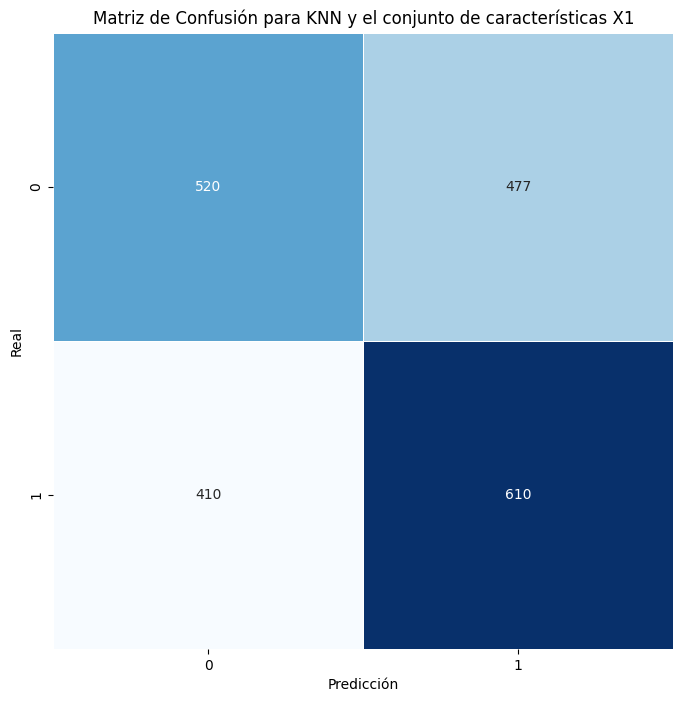


SVM (Validación Simple):

Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66       206
           1       0.64      0.58      0.61       198

    accuracy                           0.64       404
   macro avg       0.64      0.63      0.63       404
weighted avg       0.64      0.64      0.63       404

Matriz de Confusión:
[[143  63]
 [ 84 114]]

SVM (Validación Cruzada k-fold):

Accuracy promedio: 0.59
Desviación estándar de la precisión: 0.03
Matriz de Confusión:
[[589 408]
 [424 596]]


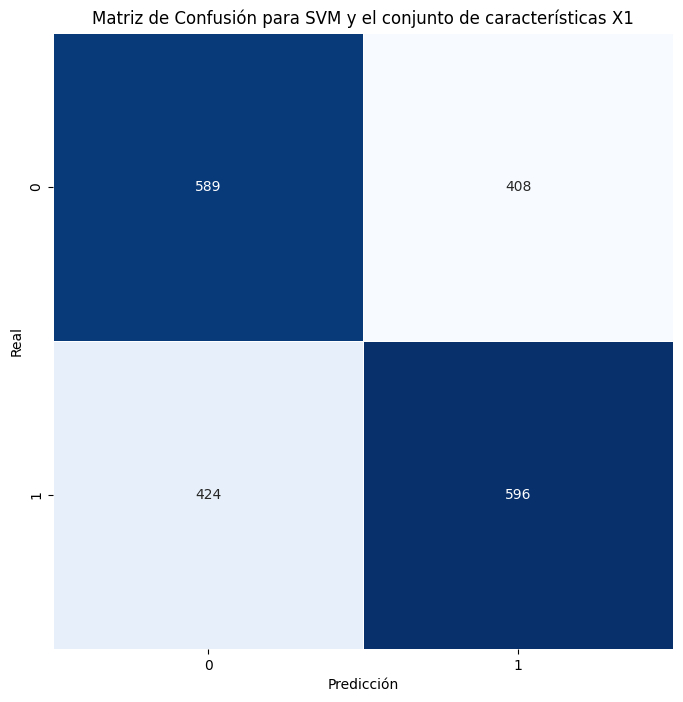


Decision Tree (Validación Simple):

Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61       206
           1       0.58      0.53      0.55       198

    accuracy                           0.58       404
   macro avg       0.58      0.58      0.58       404
weighted avg       0.58      0.58      0.58       404

Matriz de Confusión:
[[131  75]
 [ 94 104]]

Decision Tree (Validación Cruzada k-fold):

Accuracy promedio: 0.54
Desviación estándar de la precisión: 0.02
Matriz de Confusión:
[[507 490]
 [439 581]]


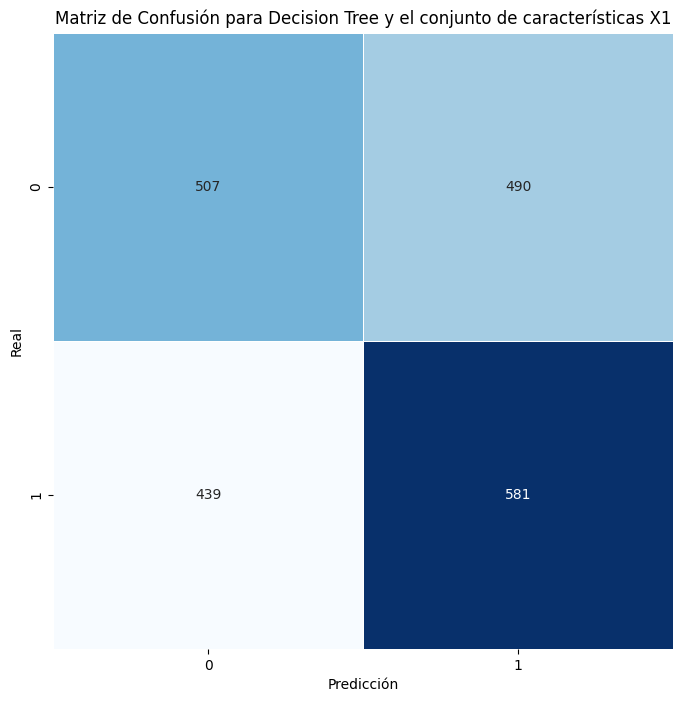


Naive Bayes (Validación Simple):

Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.30      0.40       206
           1       0.52      0.79      0.63       198

    accuracy                           0.54       404
   macro avg       0.56      0.54      0.51       404
weighted avg       0.56      0.54      0.51       404

Matriz de Confusión:
[[ 61 145]
 [ 41 157]]

Naive Bayes (Validación Cruzada k-fold):

Accuracy promedio: 0.52
Desviación estándar de la precisión: 0.06
Matriz de Confusión:
[[301 696]
 [263 757]]


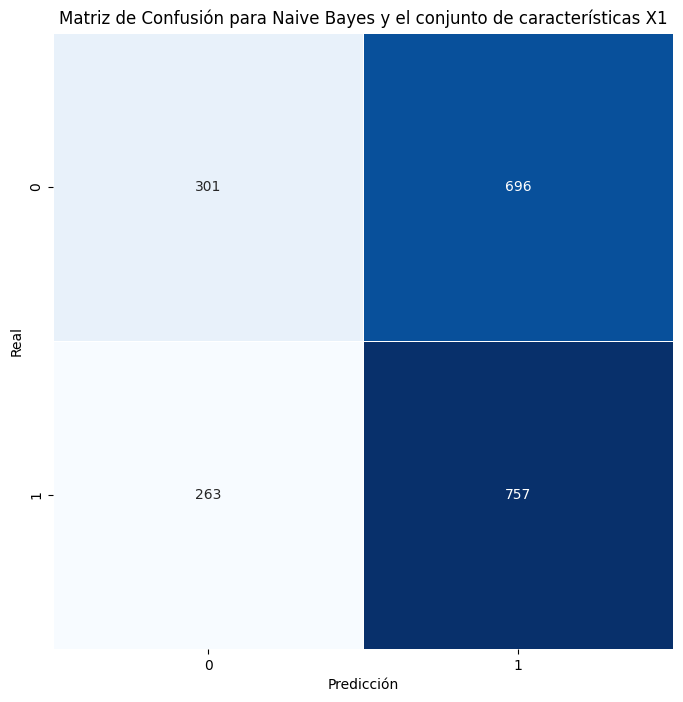


Modelos para X2:

Características seleccionadas para X2: Index(['acousticness', 'danceability', 'energy', 'instrumentalness'], dtype='object')

KNN (Validación Simple):

Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.64      0.62       206
           1       0.60      0.57      0.58       198

    accuracy                           0.60       404
   macro avg       0.60      0.60      0.60       404
weighted avg       0.60      0.60      0.60       404

Matriz de Confusión:
[[131  75]
 [ 86 112]]
Mejores parámetros KNN: {'n_neighbors': 5}
Accuracy KNN (tuned): 0.60

KNN (Validación Cruzada k-fold):

Accuracy promedio: 0.57
Desviación estándar de la precisión: 0.04
Matriz de Confusión:
[[545 452]
 [417 603]]


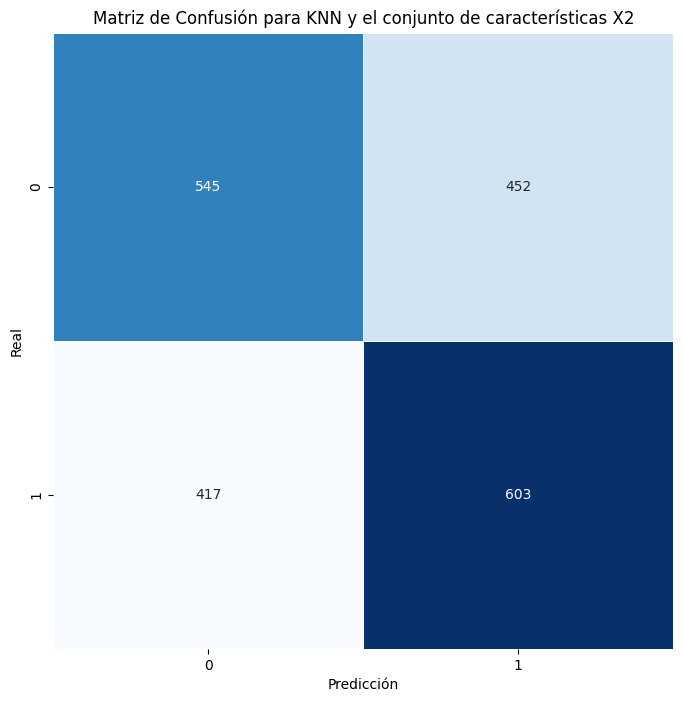


SVM (Validación Simple):

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69       206
           1       0.68      0.52      0.59       198

    accuracy                           0.65       404
   macro avg       0.65      0.64      0.64       404
weighted avg       0.65      0.65      0.64       404

Matriz de Confusión:
[[159  47]
 [ 96 102]]

SVM (Validación Cruzada k-fold):

Accuracy promedio: 0.61
Desviación estándar de la precisión: 0.05
Matriz de Confusión:
[[697 300]
 [488 532]]


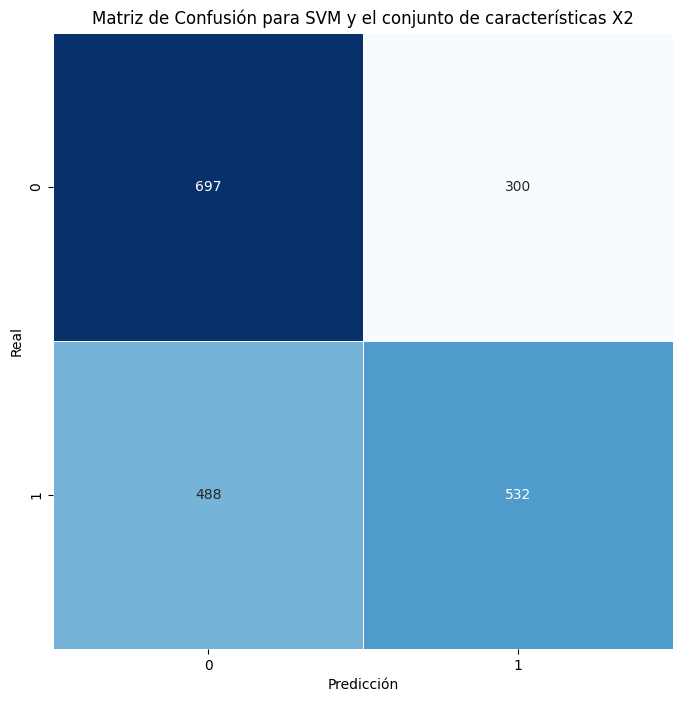


Decision Tree (Validación Simple):

Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.62      0.64       206
           1       0.62      0.66      0.64       198

    accuracy                           0.64       404
   macro avg       0.64      0.64      0.64       404
weighted avg       0.64      0.64      0.64       404

Matriz de Confusión:
[[128  78]
 [ 68 130]]

Decision Tree (Validación Cruzada k-fold):

Accuracy promedio: 0.57
Desviación estándar de la precisión: 0.02
Matriz de Confusión:
[[514 483]
 [369 651]]


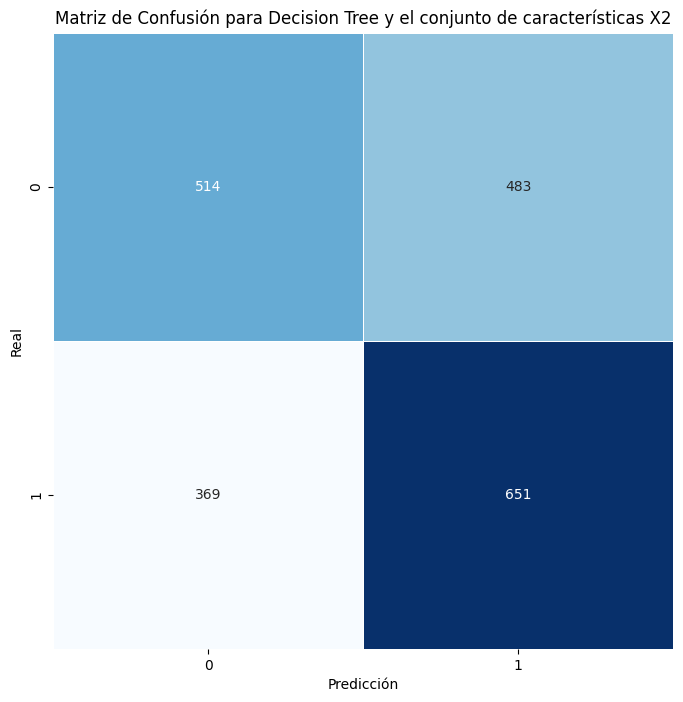


Naive Bayes (Validación Simple):

Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.45      0.52       206
           1       0.56      0.72      0.63       198

    accuracy                           0.58       404
   macro avg       0.59      0.58      0.57       404
weighted avg       0.59      0.58      0.57       404

Matriz de Confusión:
[[ 92 114]
 [ 55 143]]

Naive Bayes (Validación Cruzada k-fold):

Accuracy promedio: 0.52
Desviación estándar de la precisión: 0.06
Matriz de Confusión:
[[374 623]
 [344 676]]


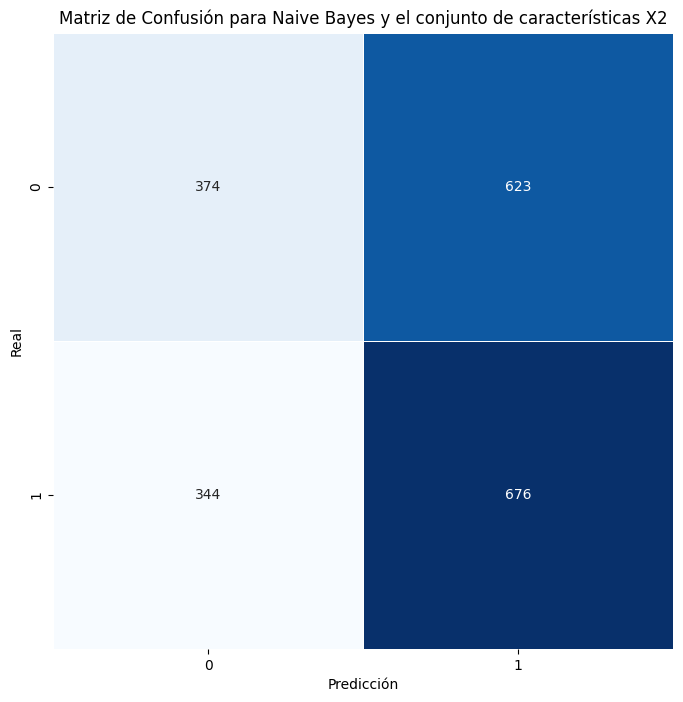


Modelos para X3:

Características seleccionadas para X3: Index(['tempo'], dtype='object')

KNN (Validación Simple):

Accuracy: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.58      0.57       206
           1       0.54      0.52      0.53       198

    accuracy                           0.55       404
   macro avg       0.55      0.55      0.55       404
weighted avg       0.55      0.55      0.55       404

Matriz de Confusión:
[[120  86]
 [ 96 102]]
Mejores parámetros KNN: {'n_neighbors': 7}
Accuracy KNN (tuned): 0.52

KNN (Validación Cruzada k-fold):

Accuracy promedio: 0.53
Desviación estándar de la precisión: 0.03
Matriz de Confusión:
[[518 479]
 [474 546]]


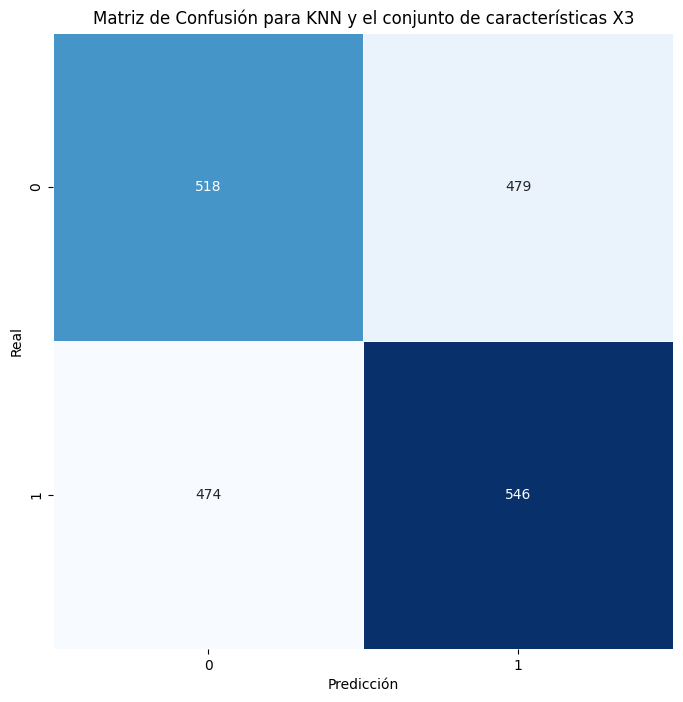


SVM (Validación Simple):

Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.43      0.48       206
           1       0.51      0.62      0.56       198

    accuracy                           0.52       404
   macro avg       0.53      0.53      0.52       404
weighted avg       0.53      0.52      0.52       404

Matriz de Confusión:
[[ 89 117]
 [ 75 123]]

SVM (Validación Cruzada k-fold):

Accuracy promedio: 0.56
Desviación estándar de la precisión: 0.05
Matriz de Confusión:
[[469 528]
 [356 664]]


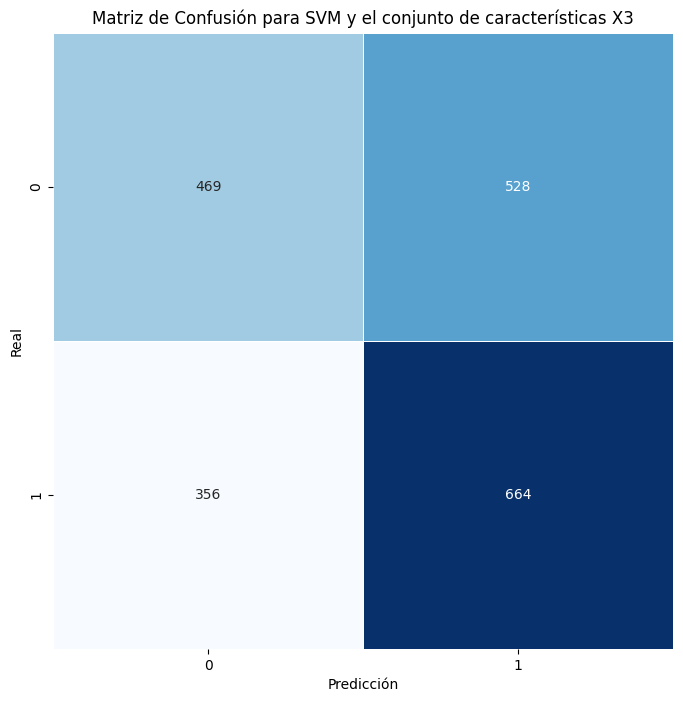


Decision Tree (Validación Simple):

Accuracy: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56       206
           1       0.52      0.48      0.50       198

    accuracy                           0.53       404
   macro avg       0.53      0.53      0.53       404
weighted avg       0.53      0.53      0.53       404

Matriz de Confusión:
[[119  87]
 [102  96]]

Decision Tree (Validación Cruzada k-fold):

Accuracy promedio: 0.51
Desviación estándar de la precisión: 0.02
Matriz de Confusión:
[[517 480]
 [508 512]]


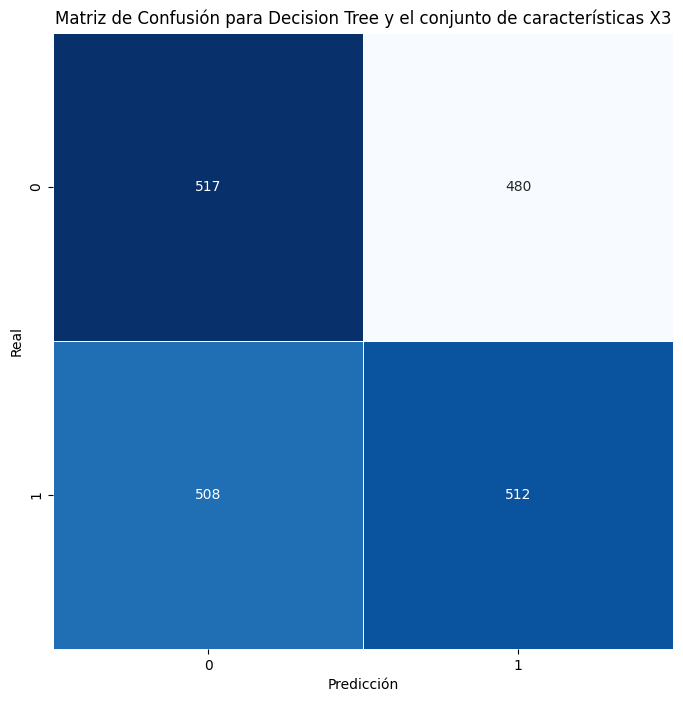


Naive Bayes (Validación Simple):

Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.33      0.41       206
           1       0.51      0.72      0.59       198

    accuracy                           0.52       404
   macro avg       0.53      0.52      0.50       404
weighted avg       0.53      0.52      0.50       404

Matriz de Confusión:
[[ 68 138]
 [ 56 142]]

Naive Bayes (Validación Cruzada k-fold):

Accuracy promedio: 0.55
Desviación estándar de la precisión: 0.05
Matriz de Confusión:
[[364 633]
 [277 743]]


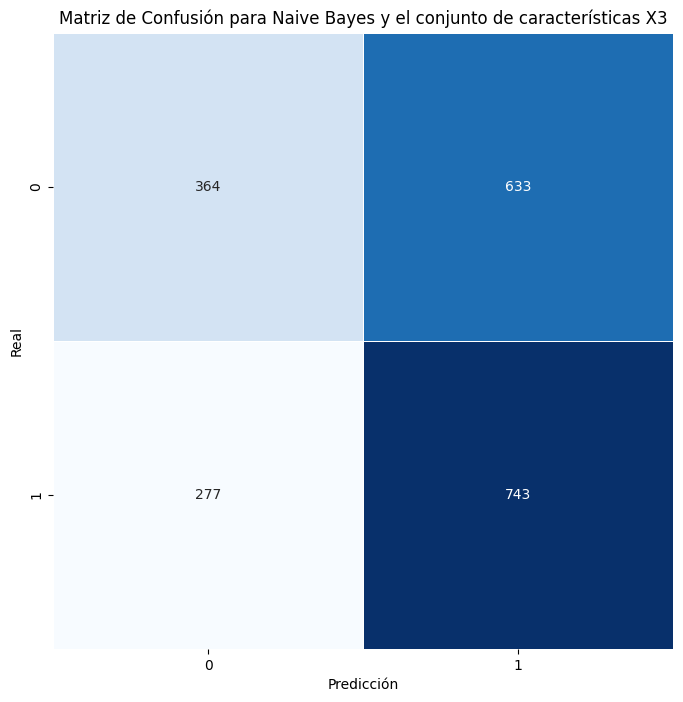

In [39]:
# Creacion de la Variable y
y = df['target']

# Feature selection
def select_features(X, y):
    clf = RandomForestClassifier()
    clf.fit(X, y)
    sfm = SelectFromModel(clf, threshold=0.15)
    sfm.fit(X, y)
    selected_features = X.columns[sfm.get_support()]
    return selected_features

# División de datos
def split_data(X, selected_features, y):
    X_selected = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Modelos
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Iteración sobre conjuntos de características
for i, X in enumerate([X1, X2, X3]):
    print(f"\nModelos para X{i+1}:\n")

    # Feature selection
    selected_features = select_features(X, y)
    print(f"Características seleccionadas para X{i+1}:", selected_features)

    # División de datos
    X_train, X_test, y_train, y_test = split_data(X, selected_features, y)

    # Entrenamiento y evaluación de modelos con validación simple
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\n{model_name} (Validación Simple):\n")
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # Matriz de confusión
        print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred)}")

        # Ajuste de hiperparámetros con GridSearchCV para KNN
        if model_name == 'KNN':
            param_grid_knn = {'n_neighbors': [3, 5, 7]}
            grid_search_knn = GridSearchCV(model, param_grid_knn, cv=5)
            grid_search_knn.fit(X_train, y_train)
            print(f"Mejores parámetros {model_name}:", grid_search_knn.best_params_)

            # Evaluación del modelo ajustado
            y_pred_tuned = grid_search_knn.predict(X_test)
            accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
            print(f"Accuracy {model_name} (tuned): {accuracy_tuned:.2f}")

        # Realizar algún tipo de validación:
        # ● Validación Simple
        # ● Validación Cruzada k-fold
        scores = cross_val_score(model, X, y, cv=5)
        print(f"\n{model_name} (Validación Cruzada k-fold):\n")
        print(f"Accuracy promedio: {scores.mean():.2f}")
        print(f"Desviación estándar de la precisión: {scores.std():.2f}")

        # Obtener predicciones para validación cruzada
        cv_pred = cross_val_predict(model, X, y, cv=5)

        # Matriz de confusión
        print(f"Matriz de Confusión:\n{confusion_matrix(y, cv_pred)}")

        # Visualización de la matriz de confusión
        plt.figure(figsize=(8, 8))
        sns.heatmap(confusion_matrix(y, cv_pred), annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=[0, 1], yticklabels=[0, 1], linewidths=.5)
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.title(f'Matriz de Confusión para {model_name} y el conjunto de características X{i+1}')
        plt.show()

Matriz de Confusión del Ensamble:
 [[140  66]
 [ 90 108]]


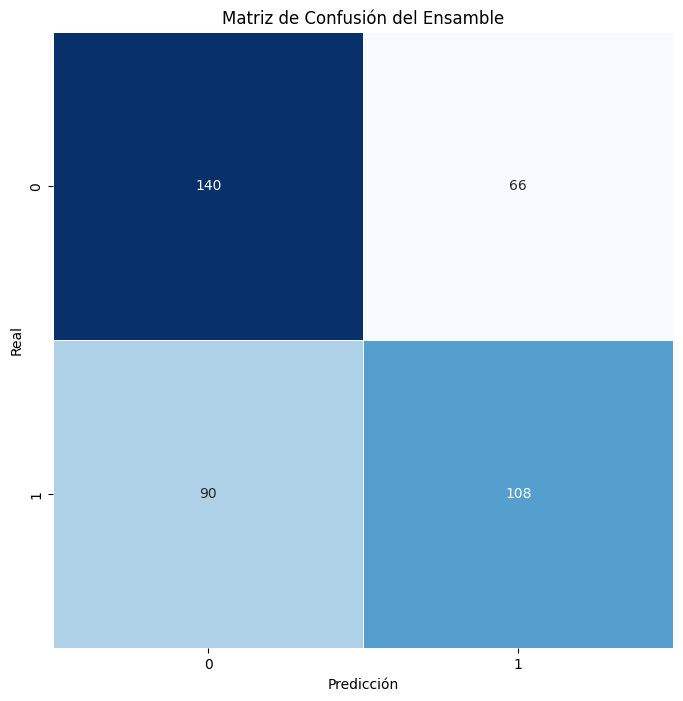

In [45]:
# Ensamble de modelos con votación mayoritaria
ensemble = VotingClassifier(list(models.items()))
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

# Matriz de Confusión del Ensamble
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print(f"Matriz de Confusión del Ensamble:\n", cm_ensemble)

# Plotear la Matriz de Confusión del Ensamble
plt.figure(figsize=(8, 8))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=[0, 1], yticklabels=[0, 1], linewidths=.5)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión del Ensamble')
plt.show()

In [46]:
# Evaluación y análisis del rendimiento: Precisión, recuperación y F1-score
# Iteración sobre conjuntos de características
for i, X in enumerate([X1, X2, X3]):
    print(f"\nModelos para X{i+1}:\n")

    # Feature selection
    selected_features = select_features(X, y)
    print(f"Características seleccionadas para X{i+1}:", selected_features)

    # División de datos
    X_train, X_test, y_train, y_test = split_data(X, selected_features, y)

    # Entrenamiento y evaluación de modelos con validación simple
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\n{model_name} (Validación Simple):\n")
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # Matriz de confusión
        print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred)}")

        # Entrenamiento y evaluación de modelos con validación cruzada k-fold
        for model_name, model in models.items():
            scores = cross_val_score(model, X, y, cv=5)
            print(f"\n{model_name} (Validación Cruzada k-fold):\n")
            print(f"Accuracy promedio: {scores.mean():.2f}")
            print(f"Desviación estándar de la precisión: {scores.std():.2f}")

            # Obtener predicciones para validación cruzada
            cv_pred = cross_val_predict(model, X, y, cv=5)

            # Matriz de confusión
            print(f"Matriz de Confusión:\n{confusion_matrix(y, cv_pred)}")

            # Reporte de clasificación
            print("Classification Report:\n", classification_report(y, cv_pred))


Modelos para X1:

Características seleccionadas para X1: Index(['acousticness', 'danceability', 'energy'], dtype='object')

KNN (Validación Simple):

Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.60      0.59       206
           1       0.56      0.54      0.55       198

    accuracy                           0.57       404
   macro avg       0.57      0.57      0.57       404
weighted avg       0.57      0.57      0.57       404

Matriz de Confusión:
[[123  83]
 [ 91 107]]

KNN (Validación Cruzada k-fold):

Accuracy promedio: 0.56
Desviación estándar de la precisión: 0.03
Matriz de Confusión:
[[520 477]
 [410 610]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.52      0.54       997
           1       0.56      0.60      0.58      1020

    accuracy                           0.56      2017
   macro avg       0.56      0.56      0.56      201